 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [146]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [147]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [148]:
# Count nulls

# YOUR CODE HERE
#whale_df.sort_index(ascending=True)
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [149]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_return = whale_df.isnull().sum()
print(whale_return)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [150]:
#whale_returns = whale_df.pct_change()
#
#whale_returns.head()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [151]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [152]:
# Count nulls
# YOUR CODE HERE
#algo_df.sort_index(ascending=True, inplace=True)
algo_df.isnull().sum()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [153]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna()
algo_df.isnull().sum()



Algo 1    0
Algo 2    6
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [154]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [155]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [156]:
# Fix Data Types
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].astype(str).str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
print(sp500_df)

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


In [157]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
#sp500_returns.sort_index (inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [158]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [159]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns={"Close": "sp500"})
sp500_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [160]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [161]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

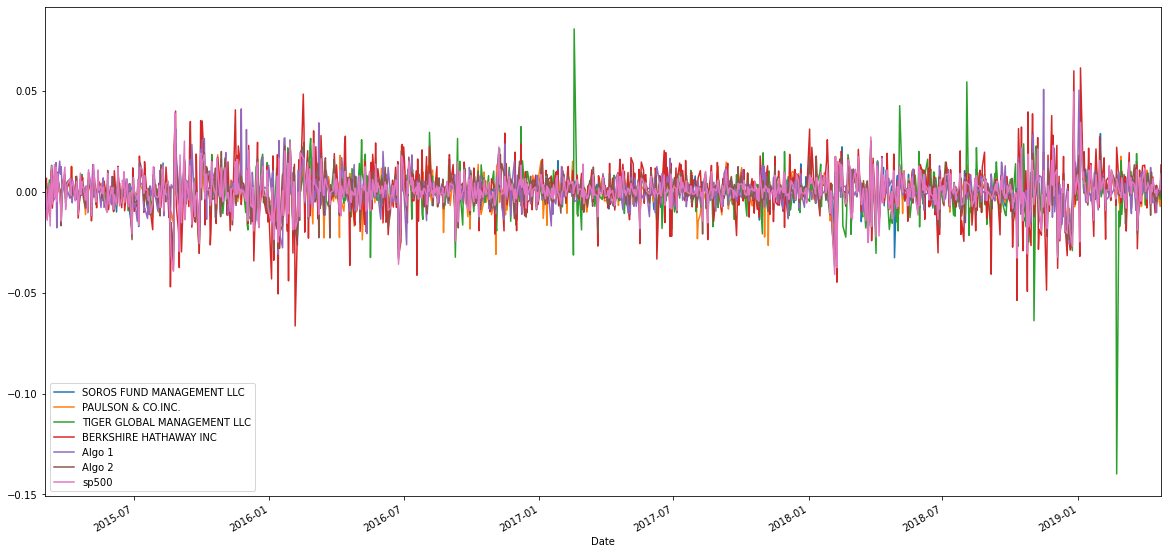

In [162]:
# Plot daily returns
# YOUR CODE HERE
#combined_daily_returns = combined_df.pct_change()
#combined_daily_returns.head()
combined_df.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

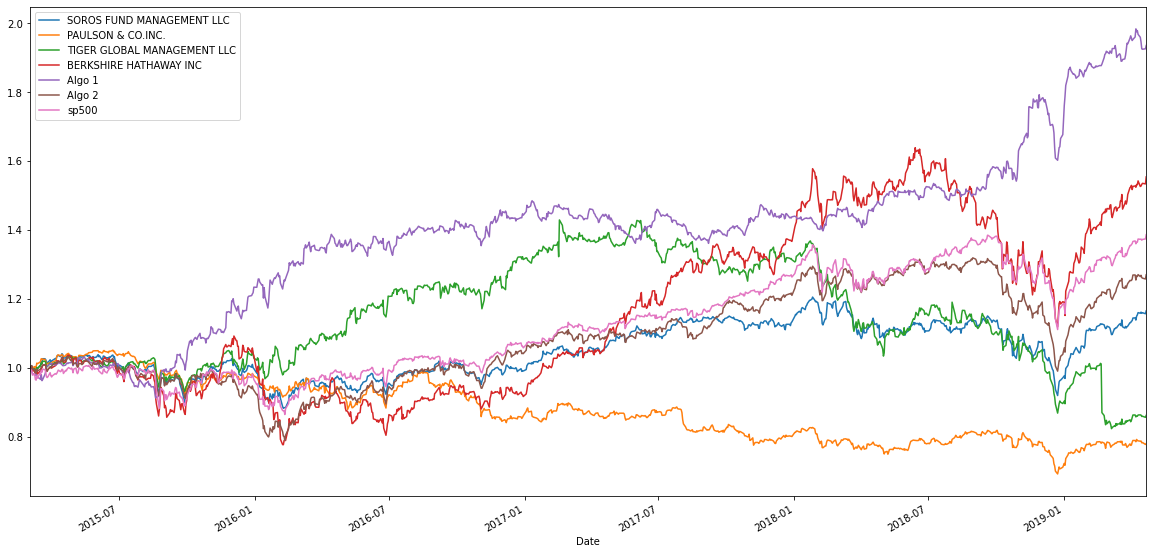

In [163]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
#cumulative_returns.head()
cumulative_returns.plot( kind='line', xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

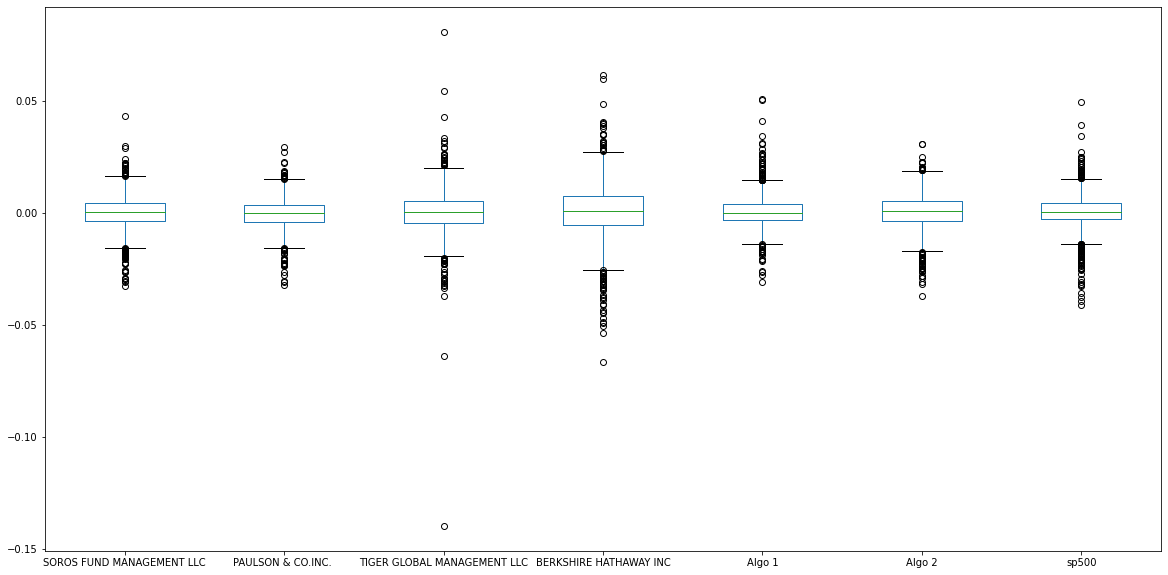

In [164]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot(kind='box', figsize=(20,10))

In [165]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
daily_std = combined_df.std()
daily_std


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

In [166]:
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
sp500_risk = combined_df["sp500"].std()
daily_std > sp500_rsik

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [167]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [168]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

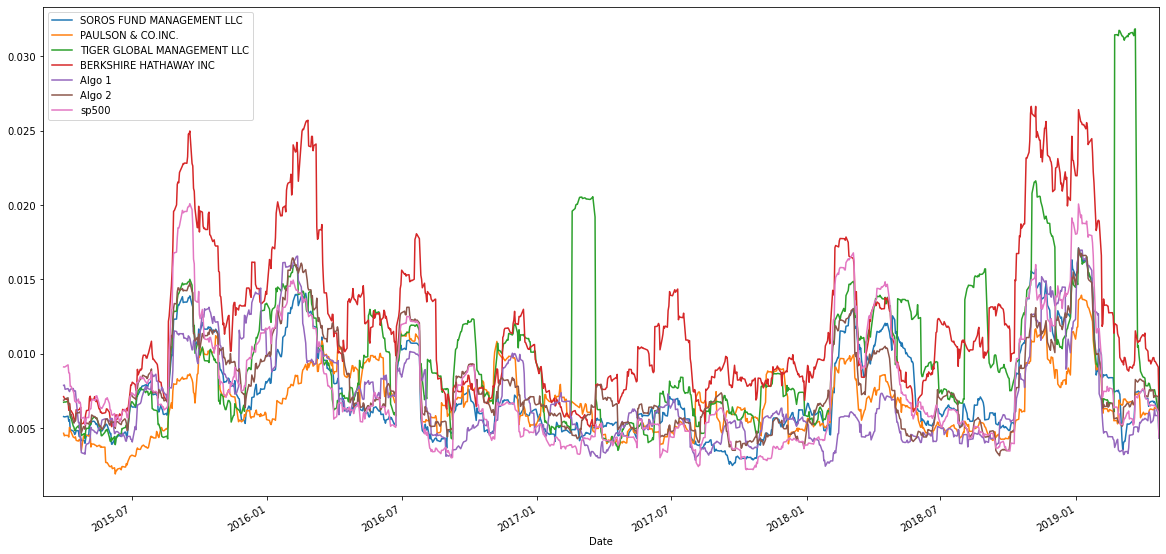

In [169]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

In [170]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


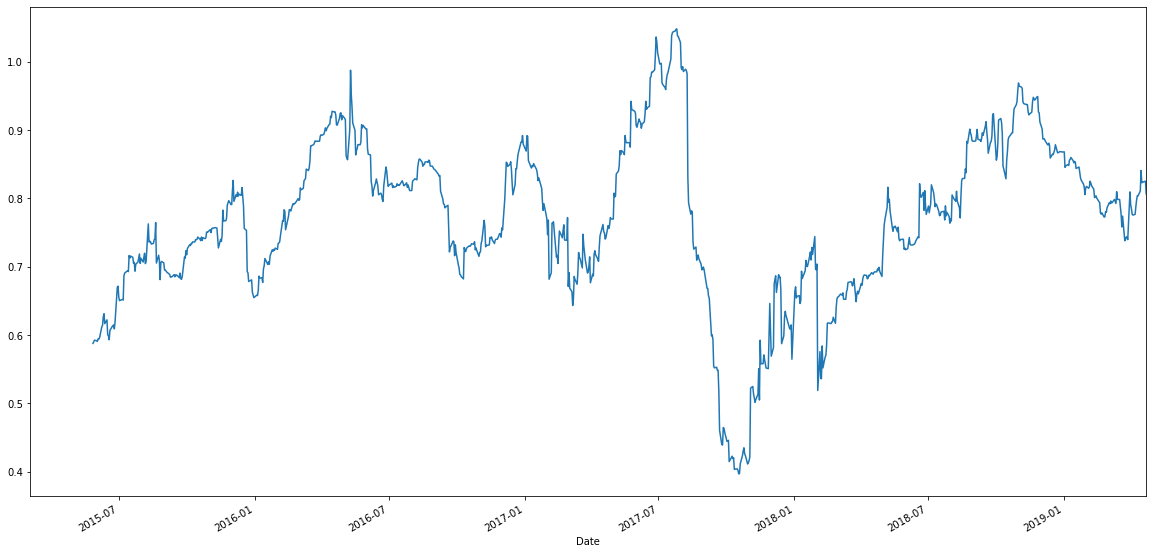

In [199]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(60).cov(combined_df['sp500'])
variance_soros = combined_df['sp500'].rolling(60).var()
beta_soros = covariance_soros/variance_soros
beta_soros.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

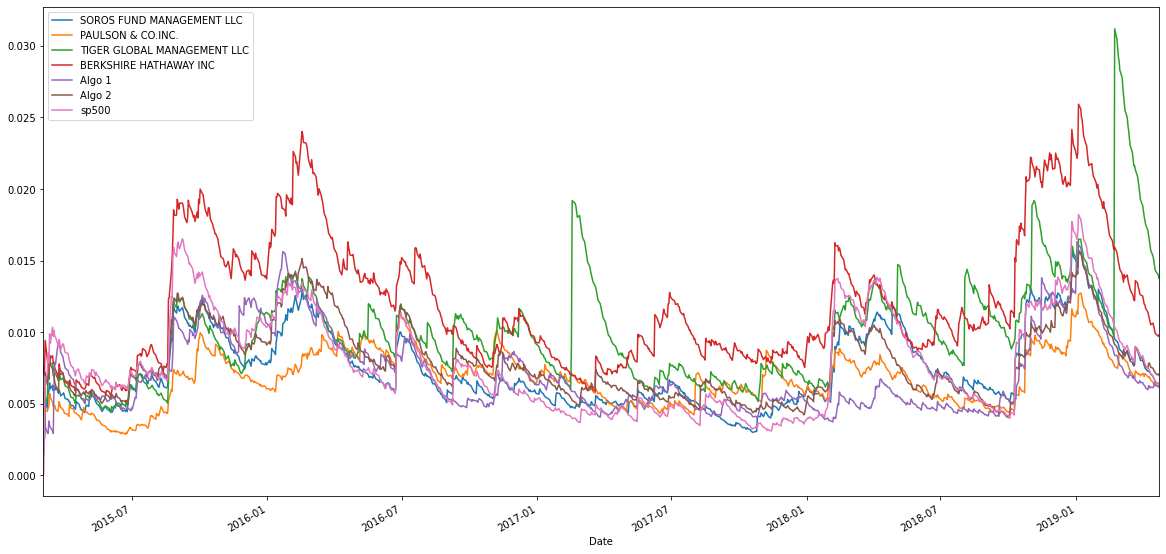

In [172]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
ewm_soros = combined_df.ewm(21).std()
ewm_soros.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [173]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

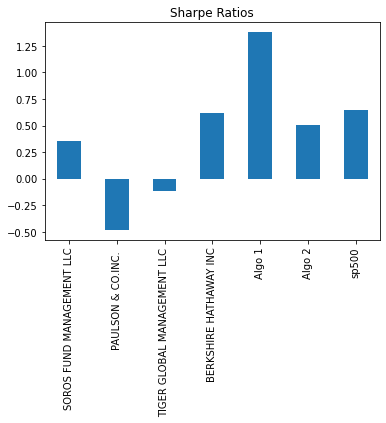

In [174]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---Algo1 outperforms sp500.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [175]:
# Read the first stock
# YOUR CODE HERE
AAl_historic_csv = Path("Resources/AAL_historic.csv")

aal_df = pd.read_csv(AAl_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# aal_df = aal_df.rename(columns={"Close": "aal"})
aal_df["Symbol"] = "AAL"
aal_df.reset_index(inplace=True)
aal_df["Date"] = aal_df["Date"].dt.date
aal_df.set_index("Date", inplace=True)
aal_df = aal_df.sort_index()

aal_df.head()

,Close,Symbol
Date,,
2015-02-12,47.88,AAL
2015-02-13,48.39,AAL
2015-02-17,48.01,AAL
2015-02-18,49.31,AAL
2015-02-19,49.78,AAL


In [176]:
# Read the second stock
# YOUR CODE HERE
DAL_historic_csv = Path("Resources/DAL_historic.csv")
dal_df = pd.read_csv(DAL_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# dal_df = dal_df.rename(columns={"Close": "dal"})
dal_df["Symbol"] = "DAL"
dal_df.reset_index(inplace=True)
dal_df["Date"] = dal_df["Date"].dt.date
dal_df.set_index("Date", inplace=True)
dal_df = dal_df.sort_index()
dal_df.head()

,Close,Symbol
Date,,
2015-02-12,44.81,DAL
2015-02-13,44.50,DAL
2015-02-17,44.76,DAL
2015-02-18,45.27,DAL
2015-02-19,45.92,DAL


In [177]:
# Read the third stock
# YOUR CODE HERE
LUV_historic_csv = Path("Resources/LUV_historic.csv")
luv_df = pd.read_csv(LUV_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# luv_df = luv_df.rename(columns={"Close": "luv"})
luv_df["Symbol"] = "LUV"
luv_df.reset_index(inplace=True)
luv_df["Date"] = luv_df["Date"].dt.date
luv_df.set_index("Date", inplace=True)
luv_df = luv_df.sort_index()
luv_df.head()

,Close,Symbol
Date,,
2015-02-12,43.50,LUV
2015-02-13,43.30,LUV
2015-02-17,42.59,LUV
2015-02-18,43.55,LUV
2015-02-19,43.76,LUV


In [178]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_data = pd.concat([aal_df, dal_df, luv_df], axis="rows", join="inner")
combined_data.tail()

,Close,Symbol
Date,,
2019-12-23,55.25,LUV
2019-12-24,54.94,LUV
2019-12-26,54.90,LUV
2019-12-27,54.32,LUV
2019-12-30,54.08,LUV


In [179]:
# Reset the index
# YOUR CODE HERE
combined_data.reset_index(inplace=True)
combined_data.head()

,Date,Close,Symbol
0,2015-02-12,47.88,AAL
1,2015-02-13,48.39,AAL
2,2015-02-17,48.01,AAL
3,2015-02-18,49.31,AAL
4,2015-02-19,49.78,AAL


In [180]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
pivoted_data = combined_data.pivot_table(values="Close", index="Date", columns="Symbol")
pivoted_data.head()

Symbol,AAL,DAL,LUV
Date,,,
2015-02-12,47.88,44.81,43.50
2015-02-13,48.39,44.50,43.30
2015-02-17,48.01,44.76,42.59
2015-02-18,49.31,45.27,43.55
2015-02-19,49.78,45.92,43.76


In [181]:
# Drop Nulls
# YOUR CODE HERE
daily_returns = pivoted_data.pct_change().dropna()
daily_returns.head()

Symbol,AAL,DAL,LUV
Date,,,
2015-02-13,0.010652,-0.006918,-0.004598
2015-02-17,-0.007853,0.005843,-0.016397
2015-02-18,0.027078,0.011394,0.022541
2015-02-19,0.009532,0.014358,0.004822
2015-02-20,0.024910,0.033101,0.023309


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [182]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2015-02-13   -0.000288
2015-02-17   -0.006136
2015-02-18    0.020337
2015-02-19    0.009571
2015-02-20    0.027107
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HER
custom_df = pd.concat([whale_df, algo_df, sp500_returns, portfolio_returns], axis="columns", join="inner")
custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.004078
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002978
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.008675
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.013382
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006229


In [226]:
custom_df["Custom"] = custom_df[0]
custom_df = custom_df.drop(columns=[0], axis="columns", errors="ignore")
custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.004078
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002978
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.008675
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.013382
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006229


In [219]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE
custom_df.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.004078
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002978
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.008675
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.013382
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006229


In [220]:
# Risk
# YOUR CODE HERE
custom_std = custom_df.std()
custom_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
Custom                         0.017706
dtype: float64

In [221]:
my_risk = custom_df["sp500"].std()
custom_std > my_risk


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
Custom                          True
dtype: bool

In [204]:
custom_annualized_std = custom_std * np.sqrt(252)
custom_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
Custom                         0.281078
dtype: float64

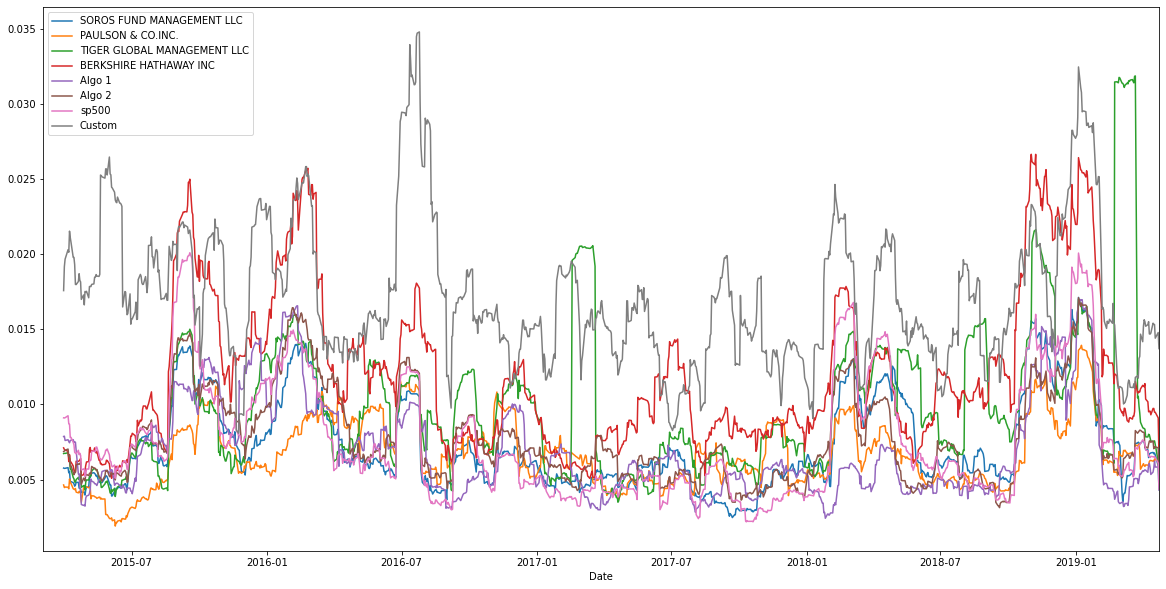

In [205]:
# Rolling
# YOUR CODE HERE
custom_df.rolling(window=21).std().plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

In [207]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
custom_sharpe_ratios = (custom_df.mean() * 252) / (custom_df.std() * np.sqrt(252))
custom_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
Custom                         0.193362
dtype: float64

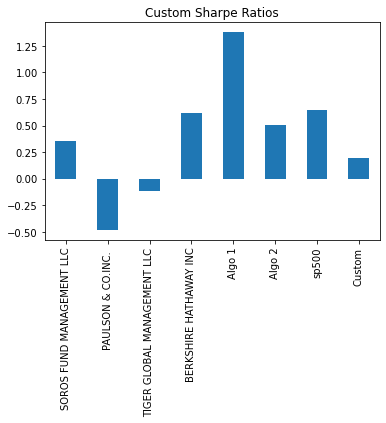

In [208]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
custom_sharpe_ratios.plot(kind="bar", title="Custom Sharpe Ratios")

In [210]:
# Create a correlation analysis
# YOUR CODE HERE
custom_correlation = custom_df.corr()
custom_correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.524621
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.404177
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.357748
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.470708
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.176262
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.526165
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.562209
Custom,0.524621,0.404177,0.357748,0.470708,0.176262,0.526165,0.562209,1.000000


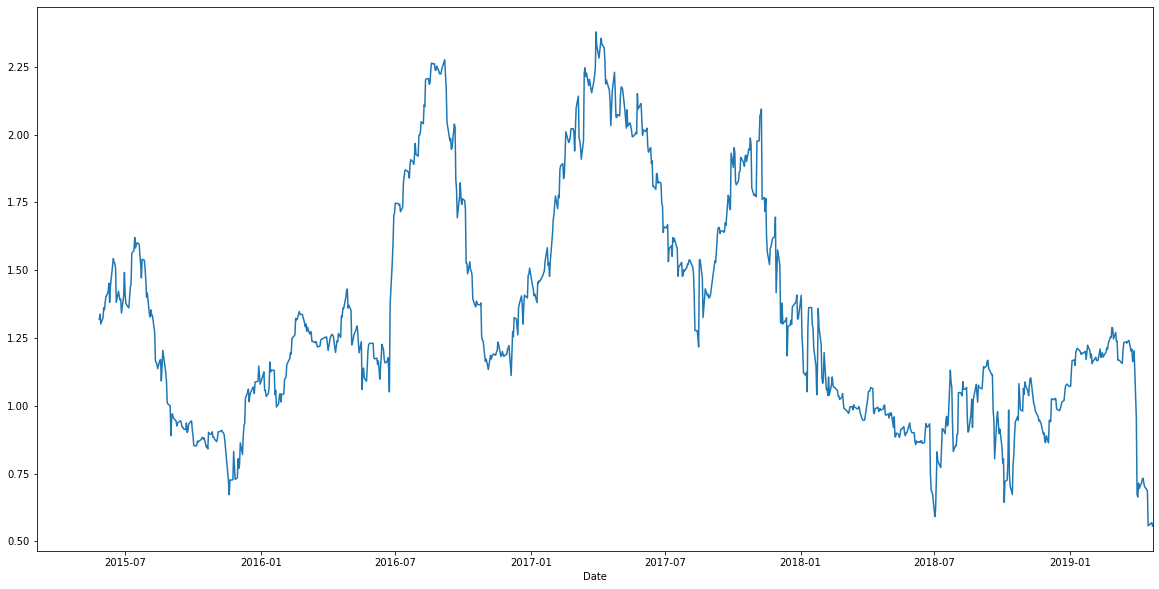

In [211]:
# Beta
# YOUR CODE HERE
covariance_custom = custom_df['Custom'].rolling(window=60).cov(custom_df['sp500'])
variance_custom= custom_df['sp500'].rolling(window=60).var()
beta_custom = covariance_custom/variance_custom
beta_custom.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))